In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(10)

In [2]:
data=pd.read_csv('HWs/HW2/Files/data/abalone.csv')

# Question 1

### Your goal is to predict abalone age, which is calculated as the number ofrings plus 1.5. Notice there currently is no  age  variable in the data set. Add age to the data set

In [3]:
data.head()

,type,longest_shell,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data['age'] = data['rings'] + 1.5
data.head()

,type,longest_shell,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Assess and describe the distribution of age

##### The distribution of age seems normal but slightly skewed right.

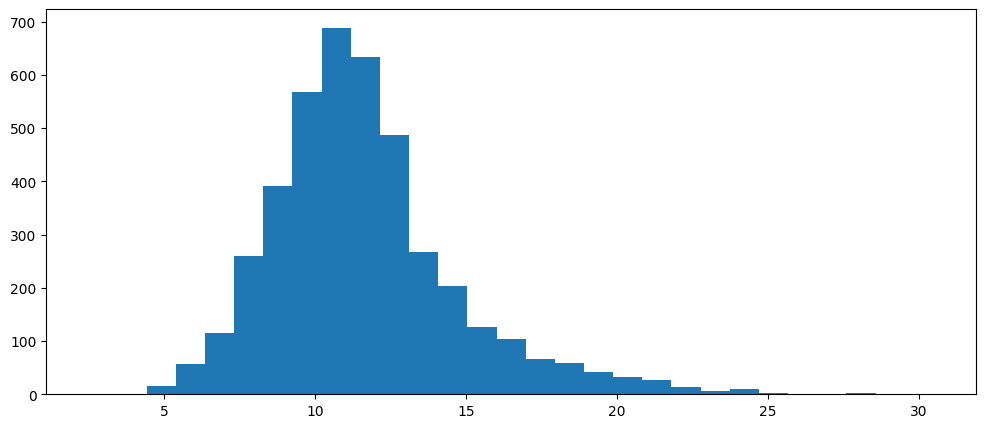

In [5]:
plt.figure(figsize=(12,5))
plt.hist(data['age'], bins=29)
plt.show()

# Question 2

##### I will complete this exercise after question 3 when features are added and data is centered, scaled.

# Question 3

### Using the training data, create a recipe predicting the outcome variable, age , with all other predictor variables. Note that you should not include rings  to predict  age . Explain why you shouldn’t use  rings  to predict age.

##### You shouldn't use rings to predict age, since rings is a linear function of age. This would allow a model to fit perfectly.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            4177 non-null   object 
 1   longest_shell   4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
 9   age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


##### We need to encode the "type" feature since it is categorical:

In [7]:
data = pd.get_dummies(data, columns=['type'],dtype=int, drop_first=True)
data.head()

,longest_shell,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age,type_I,type_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,1,0


##### We are to make interaction terms between type and shucked_weight, longest_shell and diameter, and shucked_weight and shell_weight.

In [8]:
data['shucked_weight*longest_shell'] = data['shucked_weight'] * data['longest_shell']
data['longest_shell*diamter'] = data['longest_shell'] * data['diameter']
data['shucked_weight*shell_weight'] = data['shucked_weight'] * data['shell_weight']

##### Next we will center and scale all predictors.

In [9]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_array, columns = data.columns)
scaled_data.head()

,longest_shell,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age,type_I,type_M,shucked_weight*longest_shell,longest_shell*diamter,shucked_weight*shell_weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,1.571544,-0.688018,1.316677,-0.681584,-0.629851,-0.667681
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,-0.910013,-0.688018,1.316677,-1.098397,-1.407231,-0.892239
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,-0.289624,-0.688018,-0.759488,-0.472333,-0.030582,-0.497939
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,0.020571,-0.688018,1.316677,-0.726950,-0.687896,-0.669972
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,-0.910013,1.453451,-0.759488,-1.131149,-1.498407,-0.909411


In [10]:
X = data.drop(['rings','age'], axis=1)
Y = data['age']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=.25
)

# Question 4

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

# Question 5

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
KNN = KNeighborsRegressor(n_neighbors=7)

# Question 6

In [15]:
lm.fit(X_train,Y_train);
KNN.fit(X_train,Y_train);

# Question 7

In [18]:
dict = {
        'longest_shell': .5,
        'diameter': .1,
        'height': .3,
        'whole_weight': 4,
        'shucked_weight': 1,
        'viscera_weight': 2,
        'shell_weight': 1,
        'type_I': 0,
        'type_M': 0
    }

pred_lm = pd.DataFrame(dict, index=[0])
pred_lm['shucked_weight*longest_shell'] = pred_lm['shucked_weight'] * pred_lm['longest_shell']
pred_lm['longest_shell*diamter'] = pred_lm['longest_shell'] * pred_lm['diameter']
pred_lm['shucked_weight*shell_weight'] = pred_lm['shucked_weight'] * pred_lm['shucked_weight']

pred_lm

,longest_shell,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type_I,type_M,shucked_weight*longest_shell,longest_shell*diamter,shucked_weight*shell_weight
0,0.5,0.1,0.3,4,1,2,1,0,0,0.5,0.05,1


In [19]:
lm.predict(pred_lm)[0]

10.544456063970292

# Question 8

In [20]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [21]:
pred_lm = lm.predict(X_test)
rmse_lm  = mean_squared_error(pred_lm,Y_test)**.5
r2_lm = r2_score(pred_lm, Y_test)
mae_lm = mean_absolute_error(pred_lm, Y_test)
print("Linear Regression Metrics:")
print(f"RMSE: {round(rmse_lm,2)}, R^2: {round(r2_lm,4)}, MAE: {round(mae_lm,2)}")


pred_KNN = KNN.predict(X_test)
rmse_knn = mean_squared_error(pred_KNN,Y_test)**.5
r2_knn = r2_score(pred_KNN, Y_test)
mae_knn = mean_absolute_error(pred_KNN, Y_test)
print("KNN Metrics:")
print(f"RMSE: {round(rmse_knn,2)}, R^2: {round(r2_knn,4)}, MAE: {round(mae_knn,2)}")

Linear Regression Metrics:
RMSE: 2.15, R^2: 0.2842, MAE: 1.51
KNN Metrics:
RMSE: 2.16, R^2: 0.2092, MAE: 1.51


##### The R^2 values indicate that 28% and 21% of the total variance in the data was captured by the linear and KNN models, respectively.

# Question 9

##### The models showed almost identical performance based on RMSE and MAE metrics, but the linear model performed noticeably better as shown by the R^2 metric. It is surprising to see that the models could have such similar performance based on 2 metrics, yet so different for a third. I would have expected all 3 to be consistently close.

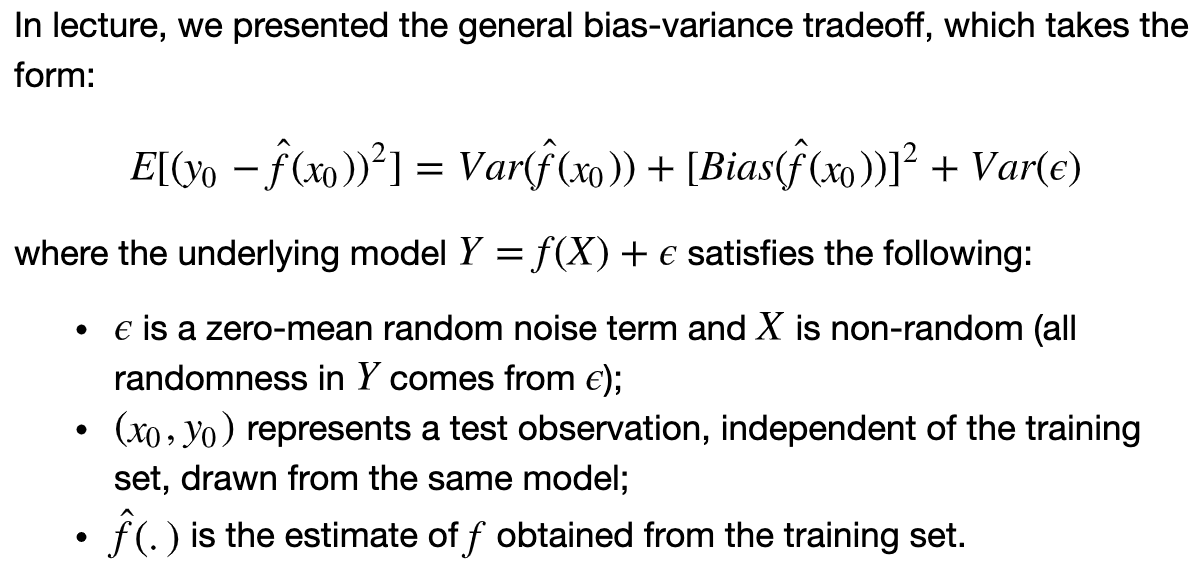

# Question 10

### Which term(s) in the bias-variance tradeoff above represent the reducible error? Which term(s) represent the irreducible error?

##### Reducible error comes from variance and bias, while irreducible error is the variance of the random noise term.

# Question 11

### Using the bias-variance tradeoff above, demonstrate that the expected test error is always at least as large as the irreducible error.

##### Clearly, the RHS (the expected test error) cannot be less than the irreducible error. In some cases, it is possible for the first two terms to be zero, but as its name suggests, irreducible error is non-zero in almost all situations and presents a lower bound for the RHS.

# Question 12

### Prove the bias-variance tradeoff